In [179]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [186]:
df = pd.read_csv('dataq_challenge_1.csv')
df['date_time'] = pd.to_datetime(df['date_time'], format= '%Y-%m-%d')
df["date"] = df["date_time"].dt.strftime('%Y-%m')

In [204]:
df = pd.read_csv('dataq_challenge_1.csv')
df['date_time'] = pd.to_datetime(df['date_time'], format= '%Y-%m-%d')
df["date"] = df["date_time"].dt.strftime('%Y-%m')



In [205]:
df.tail(10)

,barcode,item_name,date_time,price,quantity,date
84422,6161106640133,SugarSafi1kg,2021-02-04,290,1,2021-02
84423,6161106640430,Safia600ml,2021-02-04,40,1,2021-02
84424,5285000395164,Indomie_Vflavor70g,2021-02-04,60,4,2021-02
84425,6161106640430,Safia600ml,2021-02-04,40,1,2021-02
84426,6161106640430,Safia600ml,2021-02-04,40,1,2021-02
84427,6161106640089,SigaFloorElaowal1kg,2021-02-04,230,2,2021-02
84428,6161106640133,SugarSafi1kg,2021-02-04,290,1,2021-02
84429,6161106640430,Safia600ml,2021-01-18,30,1,2021-01
84430,6224007562109,SujokBeefLolli500gm,2021-01-18,700,1,2021-01
84431,5285000395164,Indomie_Vflavor70g,2021-01-18,50,2,2021-01


# Data Preprocessing 


In [188]:
#Checking Null Raws In Data
df.isnull().sum()

barcode      0
item_name    0
date_time    0
price        0
quantity     0
date         0
dtype: int64

In [226]:
df['item_name'] = df['item_name'].map({'بارد بيبسي300مل':'Papsi300ml',
                             'ماء صافية600مل':'Safia600ml',
                             'كابو حليب طازج 1 لتر':'Capomilk1Lit',
                             'كابو زبادي جامد 800 جرام':'Capoyogurt800g',
                             'دقيق سيقا الاول1كيلو':'SigaFloorElaowal1kg',
                             'اندومي نكهة خضار 70 جرام':'Indomie_Vflavor70g',
                             'مشروب تورنيدو250مل':'Tornido250ml',
                             'سكر صافي 1كيلو':'SugarSafi1kg',
                             'صلصة سعيد علبة 400جرام':'SauceSaeed400ml',
                             'شاي الغزالتين 1/2 رطل':'Elkhazaltein0.5Pound',
                             'مكرونة نوبو كوع500جرام':'NoboPasta500g',
                              'صلصة الفراشة علبة400جرام':'SauceElfarasha400g',
                             'شاي الواحة فاخر 100 جرام ربع':'Elwahatea 100g',
                             'زيت سمسم االنصر 225مل نص رطل':'ElnasrsesemOil250ml',
                             'يارا زيت زهرة الشمس 1 لتر':'YaraZahaElshmsrOil1lit',
                             'سجوك بقري لولي 500جرام':'SujokBeefLolli500gm'},
                             na_action=None)




In [189]:
duplicateRows = df[df.duplicated()]
duplicateRows

,barcode,item_name,date_time,price,quantity,date
3,8212633832015,Elkhazaltein0.5Pound,2021-02-06,410,1,2021-02
13,8212633832015,Elkhazaltein0.5Pound,2021-02-06,410,1,2021-02
14,8212634901116,SauceElfarasha400g,2021-02-06,320,1,2021-02
18,8212634901116,SauceElfarasha400g,2021-02-06,320,1,2021-02
19,8212633832015,Elkhazaltein0.5Pound,2021-02-06,410,1,2021-02
...,...,...,...,...,...,...
84424,5285000395164,Indomie_Vflavor70g,2021-02-04,60,4,2021-02
84425,6161106640430,Safia600ml,2021-02-04,40,1,2021-02
84426,6161106640430,Safia600ml,2021-02-04,40,1,2021-02
84428,6161106640133,SugarSafi1kg,2021-02-04,290,1,2021-02


In [190]:
df.describe()

,barcode,price,quantity
count,8.443200e+04,84432.000000,84432.000000
mean,4.914857e+12,424.936422,1.989222
std,2.688241e+12,512.128603,3.909289
min,1.200005e+10,4.000000,1.000000
25%,5.285000e+12,100.000000,1.000000
50%,6.161107e+12,250.000000,1.000000
75%,6.217000e+12,540.000000,2.000000
max,8.212635e+12,2300.000000,168.000000


In [191]:
df['quantity'].sum()

167954

In [192]:
# The max Quantity value
i = df['quantity'].idxmax()

# displaying the name corresponding to this index
print(df['item_name'][i])

Papsi300ml


In [193]:
df.iloc[[811]]

,barcode,item_name,date_time,price,quantity,date
811,12000052392,Papsi300ml,2021-04-01,80,168,2021-04


In [194]:
#The minimum quantity value
i = df['quantity'].idxmin()
# displaying the name corresponding to this index
print(df['item_name'][i])
df.iloc[[0]]

Indomie_Vflavor70g


,barcode,item_name,date_time,price,quantity,date
0,5285000395164,Indomie_Vflavor70g,2021-02-04,60,1,2021-02


In [195]:
#The max qunatity purchased 
i = df['quantity'].idxmax()
print(i)
# displaying the name corresponding to this index
print(df['item_name'][i])
df.iloc[[811]]

811
Papsi300ml


,barcode,item_name,date_time,price,quantity,date
811,12000052392,Papsi300ml,2021-04-01,80,168,2021-04


In [196]:
#The minimum quantity value
i = df['quantity'].idxmin()
print(i)
# displaying the name corresponding to this index
print(df['item_name'][i])
df.iloc[[84145]]

0
Indomie_Vflavor70g


,barcode,item_name,date_time,price,quantity,date
84145,12000052392,Papsi300ml,2021-01-17,4,1,2021-01


In [197]:
df['Sales'] = df['price']*df['quantity']
df

,barcode,item_name,date_time,price,quantity,date,Sales
0,5285000395164,Indomie_Vflavor70g,2021-02-04,60,1,2021-02,60
1,8212633832015,Elkhazaltein0.5Pound,2021-02-06,410,1,2021-02,410
2,12000052392,Papsi300ml,2021-02-06,60,9,2021-02,540
3,8212633832015,Elkhazaltein0.5Pound,2021-02-06,410,1,2021-02,410
4,6161106641055,Capoyogurt800g,2021-02-06,350,2,2021-02,700
...,...,...,...,...,...,...,...
84427,6161106640089,SigaFloorElaowal1kg,2021-02-04,230,2,2021-02,460
84428,6161106640133,SugarSafi1kg,2021-02-04,290,1,2021-02,290
84429,6161106640430,Safia600ml,2021-01-18,30,1,2021-01,30
84430,6224007562109,SujokBeefLolli500gm,2021-01-18,700,1,2021-01,700


In [198]:
#The max sales value during the year 
i = df['price'].idxmax()
print(i)
# displaying the name corresponding to this index
print(df['item_name'][i])
df.iloc[[5011]]

6532
SujokBeefLolli500gm


,barcode,item_name,date_time,price,quantity,date,Sales
5011,6224007562109,SujokBeefLolli500gm,2021-10-28,1925,60,2021-10,115500


In [199]:

df['item_name'].value_counts()


Papsi300ml                18741
Safia600ml                10829
Capomilk1Lit               7990
SujokBeefLolli500gm        7723
Capoyogurt800g             7633
SigaFloorElaowal1kg        5827
Indomie_Vflavor70g         5567
Tornido250ml               3502
SugarSafi1kg               3454
SauceSaeed400ml            2718
Elkhazaltein0.5Pound       2089
NoboPasta500g              1963
SauceElfarasha400g         1802
Elwahatea 100g             1753
ElnasrsesemOil250ml        1428
YaraZahaElshmsrOil1lit     1413
Name: item_name, dtype: int64

# EDA

In [207]:
df['Sales'] = df['quantity']*df['price']
df.sort_values(by=['item_name']).head(60)
daily_q = df.groupby(['item_name', 'date_time']).sum()['quantity'].reset_index()
daily_q =  daily_q.groupby(['date_time']).sum()['quantity'].reset_index()
daily_q['DayofWeek'] = daily_q['date_time'].dt.day_name()
daily_units = daily_q.groupby(['DayofWeek']).sum()['quantity'].reset_index()
weektable = daily_q.nlargest(30,'quantity')


#adding quarter column to ses the number of quantities sold ineach quarter 
df['date'] = pd.to_datetime(df['date'], format= '%Y-%m')
df['quarter'] = df['date'].dt.quarter
quarter =df.groupby(['quarter']).sum()[['quantity', 'Sales']].reset_index() 

quarter['quarter'] = quarter['quarter'].map({1:'QT1', 2:'QT2', 3:'QT3', 4:'QT4'},
                             na_action=None)

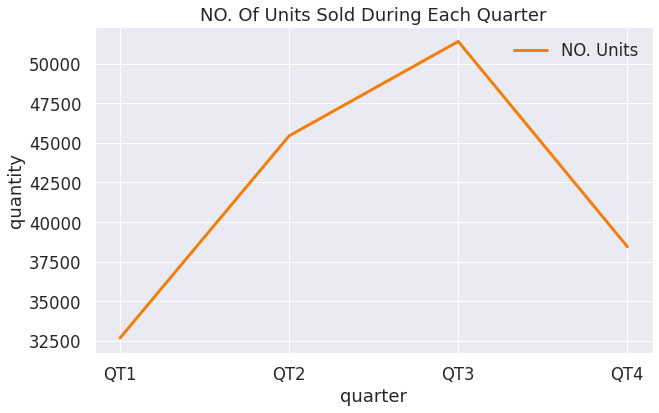

In [222]:
#Comparing sales to number of units solds During Each Quarter 
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1)
plt.rcParams['axes.labelsize'] = 6
sns.set(font_scale = 1.5)
sns.lineplot(data=quarter, x= 'quarter',
             y='quantity',linewidth=3, color='#F27F0C')
plt.title('NO. Of Units Sold During Each Quarter',fontsize=18)
plt.legend(['NO. Units'], loc='upper right')
plt.show()







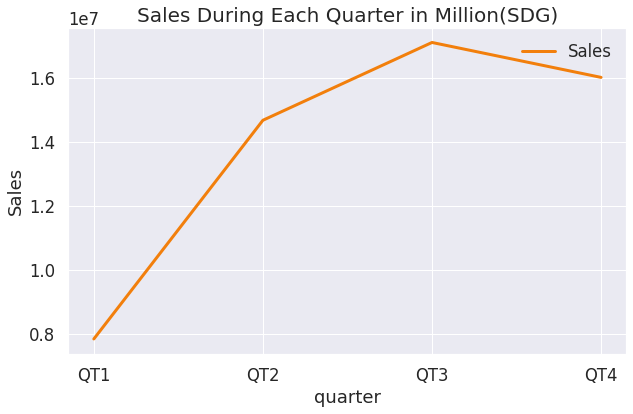

In [225]:
#Comparing sales to number of units solds During Each Quarter 
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1)
plt.rcParams['axes.labelsize'] = 6
sns.set(font_scale = 1.5)
sns.lineplot(data=quarter, x= 'quarter',
             y='Sales',linewidth=3, color='#F27F0C')
plt.title('Sales During Each Quarter in Million(SDG)',fontsize=20)
plt.legend(['Sales'], loc='upper right')
plt.show()







<ipython-input-217-1979c244a715>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Units Sold By The Day Of The Week', transperent=True, facecolor='w', dpi=1080)


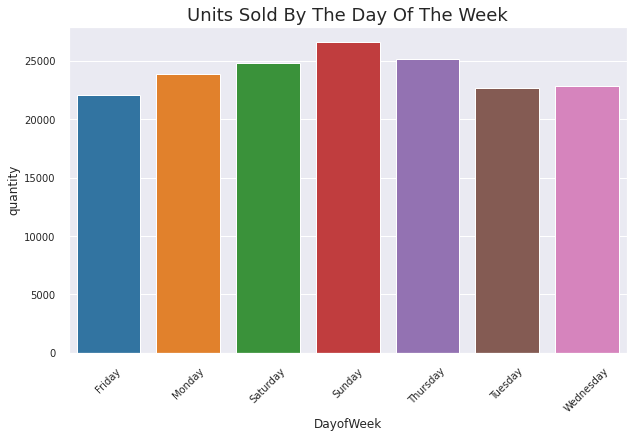

In [217]:
plt.figure(figsize=(10,6))
plt.rc('font', size=10)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.xticks(rotation=45)
sns.barplot(x = 'DayofWeek',
            y = 'quantity',
            data = daily_units, palette="tab10")
plt.title('Units Sold By The Day Of The Week')
plt.savefig('Units Sold By The Day Of The Week', transperent=True, facecolor='w', dpi=1080)
plt.show()

In [ ]:
i = df['Sales'].idxmax()
print(df['item_name'][i])

In [ ]:
points = df.date_time.unique()


In [ ]:
strend1 = df.groupby(['item_name','date']).sum()['Sales'].reset_index()

by_day = df.groupby(['date_time']).sum()['Sales'].reset_index()
by_day['date'] = pd.to_datetime(by_day['date_time'], format= '%Y-%m-%d')

strend2 = strend1.groupby(['date']).sum()['Sales'].reset_index()
strend2['date'] = pd.to_datetime(strend2['date'], format= '%Y-%m-%d')
strend2["date"] = strend2["date"].dt.strftime("%b")
#strend2['Month'] = strend2['date'].dt.month_name()
by_day


In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
sns.set(font_scale = 1)
Day = by_day['date']
Sales  =by_day['Sales']
plt.rcParams['axes.labelsize'] = 18
sns.set(font_scale = 2)
sns.lineplot(data=by_day, x= Day,
             y=Sales,linewidth=2, color='#01689c')
plt.title('Daily Sales Trend During the Year In Million SDG',fontsize=24)
plt.legend(['Sales'], loc='upper right')
plt.xticks(rotation=45)
plt.savefig('Day Sales Trend During the Year', transperent=True, facecolor='w', dpi=720)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale = 1)
plt.rcParams['axes.labelsize'] = 18
sns.set(font_scale = 2)
sns.lineplot(data=strend2, x= 'date',
             y='Sales',linewidth=5, color='#01689c')
plt.title('Sales Trend During the Year In Million SDG',fontsize=24)
plt.legend(['Sales'], loc='upper right')
plt.xticks(rotation=45)
#plt.savefig('Sales Trend During the Year', transperent=True, facecolor='w', dpi=720)
plt.show()

In [ ]:
sales_trend = df.groupby(['item_name','date']).sum()['Sales'].reset_index()
sales_trend['date'] = pd.to_datetime(sales_trend['date'], format= '%Y-%m-%d')
sales_trend["date"] = sales_trend["date"].dt.strftime('%Y-%m')
#By_products = sales_trend1.groupby(['item_name']).sum()['Sales'].reset_index()
#By_day =df.groupby(['date_time']).sum()['Sales'].reset_index()
sales_trend_1 = df.groupby(['item_name']).sum()['Sales'].reset_index()
sales_trend_1 

In [ ]:
plt.figure(figsize=(12,6))
plt.rc('font', size=10)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
ax2= plt.subplot()
bar = ax2.bar(sales_trend_1['item_name'], sales_trend_1['Sales'], color='#01689c')
plt.xticks(rotation=90)
plt.title('Sales During The Year For Each Product')
plt.xlabel('Products')
plt.ylabel('Sales In Million (SDG)')
for p in bar:
    height = p.get_height()
    ax2.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')
#plt.savefig('Bargraph of Sales During The Year.png')
#plt.savefig('Bargraph of Sales During The Year', facecolor='w', dpi=1080)
plt.show()

In [ ]:
#Check values in different category_name
category = df['item_name'].value_counts()/ len(df.index) * 100
category = pd.DataFrame(category)
category = pd.DataFrame(category.to_records())
category.rename(columns = {'item_name':'Precentage'}, inplace = True)
cat = category.round(2)
cat

In [ ]:
x = category['item_name']
y = category['index']
plt.style.use('ggplot')
#plt.figure(figsize=(12,12))
plt.rc('font', size=10)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('legend', fontsize=10)
plt.title('The Percentage Of Each Product Out Of All The Products', loc='left')
plt.pie(x=x, labels=y, autopct='%.2f%%', startangle=45)
plt.axis('equal')
plt.legend(loc='upper left')
cir = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(cir)
plt.savefig('The Percentage Of Each Product Out Of All The Products', transperent=True, facecolor='w', dpi=1080)
plt.show

In [ ]:
plt.figure(figsize=(12,6))
plt.rc('font', size=10)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
ax2= plt.subplot()

bar = ax2.bar(cat['index'], cat['Precentage'], color='#429EBD', width=0.5)
plt.xticks(rotation=90)
plt.title('% Of Each Product out Of all Products ')
plt.xlabel('Products')
plt.ylabel('Prcentage of Products %')
for p in bar:
    height = p.get_height()
    ax2.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')
#plt.savefig('Bargraph of Sales During The Year.png')
#plt.savefig('% Of Each Product out Of all Products', facecolor='w', dpi=1080)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date_time'], format= '%Y-%m-d%')
quantity = df.groupby(['item_name', 'date']).sum()['quantity'].reset_index()
quantity_qt = quantity.groupby(['item_name']).sum()['quantity'].reset_index()
quantity_qt

In [ ]:
plt.figure(figsize=(14,7))
plt.rc('font', size=10)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
ax1= plt.subplot()
quantity_qt.sort_values(by=['quantity'], inplace=True)
ax1.barh(quantity_qt['item_name'], quantity_qt['quantity'], color='#429ebdff')
plt.title('Most Top 5 Purchased Products')
for i in ax1.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2,
             str(round((i.get_width()), 4)),
             fontsize = 12,
             color='#021E66')
#plt.savefig('Most Top Eight Purchased Items', transperent=True, facecolor='w', dpi=1080)
plt.show()

<ipython-input-7-b3d30e476022>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('proportional increase in sales value for products', transperent=True, facecolor='w', dpi=1080)


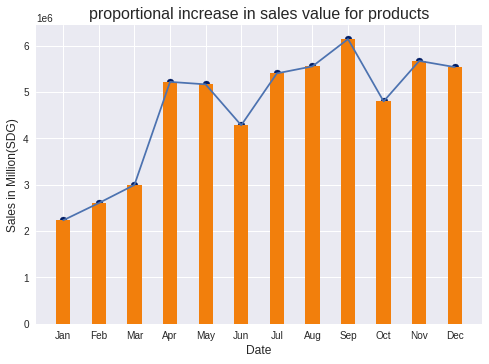

In [7]:
#proportional increase in sales value for products during the year ?
pro_increase = df.groupby(['date']).sum()['Sales'].reset_index()
pro_increase['date'] = pd.to_datetime(pro_increase['date'], format= '%Y-%m-%d')
pro_increase["date"] = pro_increase["date"].dt.strftime("%b")
x = pro_increase['date']
y = pro_increase['Sales']

plt.style.use('seaborn')
plt.rc('font', size=10)
plt.rc('axes', titlesize=16) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('legend', fontsize=10)
plt.bar(x=pro_increase['date'], height=pro_increase['Sales'], width=0.4, color='#F27F0C')
y2 = [i+3 for i in y ]
plt.plot(x, y2)
plt.scatter(x, y2, color='#021E66')
plt.title('proportional increase in sales value for products')
plt.xlabel('Date')
plt.ylabel('Sales in Million(SDG)')
plt.savefig('proportional increase in sales value for products', transperent=True, facecolor='w', dpi=1080)
plt.show()

In [ ]:
#total number of Sales during the year 
sum_sales = df['Sales'].sum()
sum_sales

In [ ]:
Quantities = df['quantity'].sum()
Quantities

# Price Elasticity of Demand

In [153]:
#df['date'] = pd.to_datetime(df['date'], format= '%Y-%m')
prices_vs_quantities = df.groupby(['item_name', 'date']).agg({'price': 'mean', 'quantity':'mean'}).reset_index()
prices_vs_quantities.sort_values(by=['item_name']).head(60)

,item_name,date,price,quantity
0,Capomilk1Lit,2021-01,275.950872,1.616482
11,Capomilk1Lit,2021-12,804.143302,1.369159
10,Capomilk1Lit,2021-11,789.093923,1.360497
9,Capomilk1Lit,2021-10,708.640553,1.375576
7,Capomilk1Lit,2021-08,632.511038,1.435982
6,Capomilk1Lit,2021-07,609.779412,1.461765
8,Capomilk1Lit,2021-09,683.863436,1.409692
4,Capomilk1Lit,2021-05,447.631321,1.430669
3,Capomilk1Lit,2021-04,400.057803,1.439306
2,Capomilk1Lit,2021-03,366.150082,1.482871


/home/banwel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


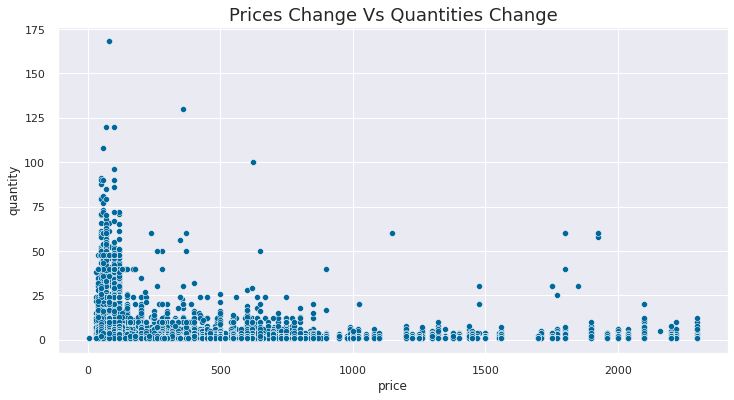

In [10]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(df['price'], df['quantity'], color = '#01689c')
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=12)
plt.title('Prices Change Vs Quantities Change')
plt.savefig('Prices Change Vs Quantities Change', facecolor='w', dpi=1080)
plt.show()

In [53]:
#For a price or percentage increase:
#[(New Price - Old Price)/Old Price] x 100

#For a price or percentage decrease:
#[(Old Price - New Price)/Old Price] x 100



# -----------------------------------------------------------------------------------------------
Price Easticity For Each Product And Ther  Ranking 

In [103]:
NoboPasta500g = df.loc[df['item_name'] == 'NoboPasta500g']
Capoyogurt800g = df.loc[df['item_name'] == 'Capoyogurt800g']
YaraZahaElshmsrOil1lit = df.loc[df['item_name'] == 'YaraZahaElshmsrOil1lit']
Elwahatea100g = df.loc[df['item_name'] == 'Elwahatea 100g']
Safia600ml = df.loc[df['item_name'] == 'Safia600ml']
SigaFloorElaowal1kg = df.loc[df['item_name'] == 'SigaFloorElaowal1kg']
Elkhazaltein05Pound = df.loc[df['item_name'] == 'Elkhazaltein0.5Pound']
SujokBeefLolli500gm = df.loc[df['item_name'] == 'SujokBeefLolli500gm']
Papsi300ml = df.loc[df['item_name'] == 'Papsi300ml']
SugarSafi1kg = df.loc[df['item_name'] == 'SugarSafi1kg']
Indomie_Vflavor70g = df.loc[df['item_name'] == 'Indomie_Vflavor70g']
Tornido250ml = df.loc[df['item_name'] == 'Tornido250ml']
SauceElfarasha400g = df.loc[df['item_name'] == 'SauceElfarasha400g']
ElnasrsesemOil250ml = df.loc[df['item_name'] == 'ElnasrsesemOil250ml']
Capomilk1Lit = df.loc[df['item_name'] == 'Capomilk1Lit']
Papsi300ml.sort_values(by=['date_time'])





,barcode,item_name,date_time,price,quantity,date,Sales
55876,12000052392,Papsi300ml,2021-01-01,50,1,2021-01,50
55947,12000052392,Papsi300ml,2021-01-01,50,1,2021-01,50
55945,12000052392,Papsi300ml,2021-01-01,50,1,2021-01,50
55938,12000052392,Papsi300ml,2021-01-01,50,1,2021-01,50
55937,12000052392,Papsi300ml,2021-01-01,50,2,2021-01,100
...,...,...,...,...,...,...,...
82763,12000052392,Papsi300ml,2021-12-31,120,3,2021-12,360
82764,12000052392,Papsi300ml,2021-12-31,120,18,2021-12,2160
82765,12000052392,Papsi300ml,2021-12-31,120,6,2021-12,720
82756,12000052392,Papsi300ml,2021-12-31,120,4,2021-12,480


In [123]:
#For a price or percentage increase:
#[(New Price - Old Price)/Old Price] x 100
#For a price or percentage decrease:
#[(Old Price - New Price)/Old Price] x 100
#PED = change Q / change p
NoboPasta500g = (6-2/2)/(350-140/140)
Capoyogurt800g = (26 -23)/(850-270/270)
SigaFloorElaowal1kg = (48-40/40)/(550-160/160)
Safia600ml = (22-103/22)/(100-30/30)
SujokBeefLolli500gm = (27-24/24)/(2200 - 700/700)
Papsi300ml = (181 - 136/136)/(120-50/50)
Papsi300ml

1.5126050420168067

In [124]:
Safia600ml

0.17493112947658404

In [154]:
prices_vs_quantities["% Change in Demand"] = prices_vs_quantities["quantity"].pct_change()
prices_vs_quantities["% Change in Price"] = prices_vs_quantities["price"].pct_change()
prices_vs_quantities["PriceElasticity"] = prices_vs_quantities["% Change in Demand"] / prices_vs_quantities["% Change in Price"]


In [155]:
prices_vs_quantities

,item_name,date,price,quantity,% Change in Demand,% Change in Price,PriceElasticity
0,Capomilk1Lit,2021-01,275.950872,1.616482,NaN,NaN,NaN
1,Capomilk1Lit,2021-02,341.469072,1.463918,-0.094380,0.237427,-0.397513
2,Capomilk1Lit,2021-03,366.150082,1.482871,0.012947,0.072279,0.179128
3,Capomilk1Lit,2021-04,400.057803,1.439306,-0.029379,0.092606,-0.317243
4,Capomilk1Lit,2021-05,447.631321,1.430669,-0.006001,0.118917,-0.050465
...,...,...,...,...,...,...,...
186,YaraZahaElshmsrOil1lit,2021-08,1349.710983,1.040462,-0.043521,-0.000033,1302.072029
187,YaraZahaElshmsrOil1lit,2021-09,1323.639456,1.040816,0.000340,-0.019316,-0.017609
188,YaraZahaElshmsrOil1lit,2021-10,1426.923077,1.076923,0.034691,0.078030,0.444583
189,YaraZahaElshmsrOil1lit,2021-11,1469.534884,1.081395,0.004153,0.029863,0.139064


In [156]:
x_frame1 = prices_vs_quantities.pivot(index= 'date' ,columns='item_name' ,values='price')
x_frame = pd.DataFrame(x_frame1.to_records())

In [157]:
x_frame

,date,Capomilk1Lit,Capoyogurt800g,Elkhazaltein0.5Pound,ElnasrsesemOil250ml,Elwahatea 100g,Indomie_Vflavor70g,NoboPasta500g,Papsi300ml,Safia600ml,SauceElfarasha400g,SauceSaeed400ml,SigaFloorElaowal1kg,SugarSafi1kg,SujokBeefLolli500gm,Tornido250ml,YaraZahaElshmsrOil1lit
0,2021-01,275.950872,302.667877,332.227564,322.500000,164.375000,46.650000,157.666667,54.139446,33.824027,201.976744,229.500000,189.631068,229.941860,775.446281,80.000000,581.034483
1,2021-02,341.469072,409.321343,437.603093,348.603604,215.751515,72.478632,211.556213,68.222222,40.000000,381.987952,392.945455,262.506903,351.253968,951.666667,100.000000,879.358974
2,2021-03,366.150082,436.442765,449.423077,352.647059,220.000000,77.142857,206.717557,72.169879,45.265974,400.684932,418.232558,269.756637,356.254682,1167.712264,101.088647,949.230769
3,2021-04,400.057803,472.206119,451.111111,364.660194,218.898305,77.062914,214.096386,81.621899,50.000000,369.852941,365.977230,275.344551,354.934383,1537.425641,150.000000,1027.857143
4,2021-05,447.631321,489.700333,504.299065,365.078534,225.315315,84.758364,225.000000,84.385975,53.126984,385.294118,353.943299,292.416813,338.375000,1831.782284,151.080247,1039.215686
5,2021-06,530.432148,532.986799,600.634921,450.000000,297.185185,100.000000,260.408163,100.000000,63.689076,454.806202,391.241135,321.761099,375.699708,2076.110020,160.227273,1297.272727
6,2021-07,609.779412,622.672540,623.034483,450.000000,295.529412,129.725086,234.721030,100.000000,67.091255,467.757576,573.731343,331.744681,375.479798,2060.644007,NaN,1349.756098
7,2021-08,632.511038,700.692432,625.550459,452.000000,297.714286,123.664516,257.396226,100.000000,68.890490,612.040816,654.029851,348.580180,380.435096,2064.150943,200.000000,1349.710983
8,2021-09,683.863436,720.156250,628.497409,446.296296,299.436620,143.115871,262.421053,100.000000,74.212300,700.000000,751.750000,361.098039,384.597156,2098.633441,200.000000,1323.639456
9,2021-10,708.640553,720.674419,622.335329,444.505495,289.736842,129.927007,291.310924,99.966710,75.577342,800.000000,815.723270,515.929134,656.923077,2216.821632,200.000000,1426.923077


In [158]:
y_frame1 = prices_vs_quantities.pivot(index= 'date' ,columns='item_name' ,values='quantity')
y_frame = pd.DataFrame(y_frame1.to_records())
y_frame

,date,Capomilk1Lit,Capoyogurt800g,Elkhazaltein0.5Pound,ElnasrsesemOil250ml,Elwahatea 100g,Indomie_Vflavor70g,NoboPasta500g,Papsi300ml,Safia600ml,SauceElfarasha400g,SauceSaeed400ml,SigaFloorElaowal1kg,SugarSafi1kg,SujokBeefLolli500gm,Tornido250ml,YaraZahaElshmsrOil1lit
0,2021-01,1.616482,1.230490,1.166667,1.671875,1.025000,3.140000,1.496296,2.147087,1.896785,1.286822,1.321212,1.914239,1.534884,1.603306,2.666667,1.086207
1,2021-02,1.463918,1.199041,1.237113,1.909910,1.057576,3.841880,1.479290,2.348148,2.015734,1.269076,1.538182,2.007890,1.658730,1.442761,1.856589,1.057692
2,2021-03,1.482871,1.190065,1.147436,1.000000,1.236111,3.745342,1.587786,2.119914,2.134984,1.155251,1.306977,1.734513,1.430712,1.515723,1.687403,1.015385
3,2021-04,1.439306,1.236715,1.333333,1.271845,1.334746,4.019868,1.337349,2.374679,2.895914,1.316176,1.383302,1.931090,1.493438,1.606154,2.059322,1.100000
4,2021-05,1.430669,1.256382,1.130841,1.298429,1.337838,5.011152,1.263158,2.383124,2.584921,1.305882,1.244845,1.922942,1.490625,1.405550,2.364198,1.117647
5,2021-06,1.471673,1.262376,1.103175,1.849057,1.229630,5.163265,1.392857,2.096417,2.691597,1.201550,1.180851,1.579281,1.425656,1.402750,2.431818,1.090909
6,2021-07,1.461765,1.243759,1.206897,1.811966,1.047059,3.808706,1.433476,2.541405,3.181559,1.181818,1.365672,1.880851,1.434343,1.665474,NaN,1.087805
7,2021-08,1.435982,1.278583,1.247706,1.580000,1.028571,4.441935,1.354717,2.279379,3.060519,1.285714,1.388060,1.790991,1.355769,1.449400,1.858333,1.040462
8,2021-09,1.409692,1.300000,1.155440,1.444444,1.084507,3.988315,1.357895,2.167003,2.572873,1.152174,1.310000,2.005882,1.428910,1.496785,1.766509,1.040816
9,2021-10,1.375576,1.300000,1.119760,1.428571,1.157895,4.812652,1.848739,2.046997,2.667756,1.289474,1.245283,3.374016,1.639423,1.508539,2.076412,1.076923


In [159]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
    "rsquared":[]
}
#Append x_frame with y_frame per same product name
for column in x_frame.columns[1:]:
    
    column_points = []
    
    for i in range(len(x_frame[column])):
        
        if not np.isnan(x_frame[column][i]) and not np.isnan(y_frame[column][i]):
            
            column_points.append((x_frame[column][i], y_frame[column][i]))
            
    dataset = pd.DataFrame(list(column_points), columns= ['x_frame', 'y_frame'])
    
      #Linear Regression Model
    import statsmodels.api as sm
    x_value = dataset['x_frame']
    y_value = dataset['y_frame']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:
        
        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues
     
        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)    
            
        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["rsquared"].append(rsquared)

    
        

   

In [160]:
        
final_df = pd.DataFrame.from_dict(results_values)
df_elasticity =final_df[['name','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept','rsquared']]
df_elasticity
   

,name,price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept,rsquared
0,Capomilk1Lit,-0.117107,-4.452929,0.001230,-0.000308,549.143580,1.443132,1.612133,0.664751
1,Capoyogurt800g,0.157880,4.509868,0.001126,0.000346,580.050488,1.272667,1.071738,0.670390
2,Safia600ml,0.538037,3.965502,0.002663,0.023847,60.116252,2.664456,1.230879,0.611276
3,SugarSafi1kg,0.136080,2.455695,0.033926,0.000496,416.124052,1.516035,1.309732,0.376187


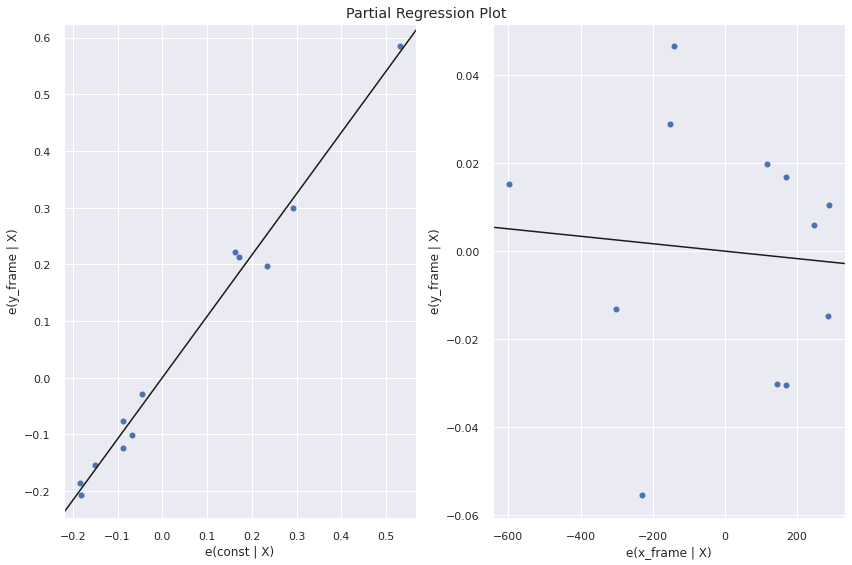

In [161]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [162]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                y_frame   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   0.06621
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.802
Time:                        11:07:05   Log-Likelihood:                 25.924
No. Observations:                  12   AIC:                            -47.85
Df Residuals:                      10   BIC:                            -46.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0809      0.040     27.163      0.0

/home/banwel/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
